<a href="https://colab.research.google.com/github/nbeaudoin/PyTorch-marathon/blob/main/PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [24]:
import torch
from torch import nn  ## nn contains all neural net building blocks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Machine learning is a game of two parts:
1. Get data into a numerical represetation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create known data using the linear regression formula

We'll use a linear regression formula to make a straight line with known **paramaters**

In [9]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [10]:
len(X), len(y)

(50, 50)

### Splitting data into train and test sets

In [11]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [12]:
### Visualize!

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training_data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot preds if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label=predictions)

    # SHow the legned
    plt.legend(prop={"size": 14});

In [13]:
plot_predictions()

NameError: ignored

### 2. Build model

Goal is to start with random numbers and update those numbers to learn the pattern.

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values

How does it do so?

Through two main algos:
1. Gradient decsent -> https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropogration -> See above for series ^^^

In [14]:
import torch
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):  ## <- almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()   ## calls from the parent class
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))   ## float32 is default for PyTorch


    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) ## "x" is the input data
      return self.weights * x + self.bias   ## this is the linear regression formula

SyntaxError: ignored

### PyTorch model building essentials

* torch.nn: All building blocks for computational graphs
* torch.nn.Parameter: These will normally be set for us
* torch.nn.Module: Base class for all neural network moduels. If you subsclass it, you should overwrite forward()
* torch.optim: Optimizers help with gradient descent
* def forward() - All nn.Module subsclasses requires you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model let's see what's inside.

We can check out what is inside our model using `.parameters()`

In [15]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [16]:
# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [17]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.3904]))])

In [18]:
weight, bias

(0.7, 0.3)

The closer we can get these two values to our original values, the better our model will be. Beyond this simple case, we won't know what these values are.

### Making prediction using `torch.inference_mode()

To check out model's predictive power let's see how well it predicts `y_test` based on `X_test`

When we pass our data through our model, it's going to run it thorugh our forward method.

**Classes**: In Python, the `with` statement is used to simplify resource management, particularly when working with external resources like files or network connections. When used with classes, it typically involves using a special method called __enter__ to set up the resource and __exit__ to tear it down.

The with statement ensures that the __exit__ method is called even if an exception is raised during the execution of the code inside the with block. This is commonly referred to as a context manager.

In [19]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [20]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.4935],
        [0.4961],
        [0.4986],
        [0.5012],
        [0.5038],
        [0.5064],
        [0.5090],
        [0.5115],
        [0.5141],
        [0.5167]])

This error happens often ^^^

Try changing the spacing

You can go into Settings to "show line numbers"

In [21]:
import torch
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):  ## <- almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()   ## calls from the parent class
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))   ## float32 is default for PyTorch


    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:    ## "x" is the input data
    return self.weights * x + self.bias   ## this is the linear regression formula

In [22]:
# Make predictions with model
model_0 = LinearRegressionModel()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3938],
        [0.4003],
        [0.4068],
        [0.4133],
        [0.4198],
        [0.4264],
        [0.4329],
        [0.4394],
        [0.4459],
        [0.4524]])

Notice that there are no gradients being tracked. More on this in a bit.

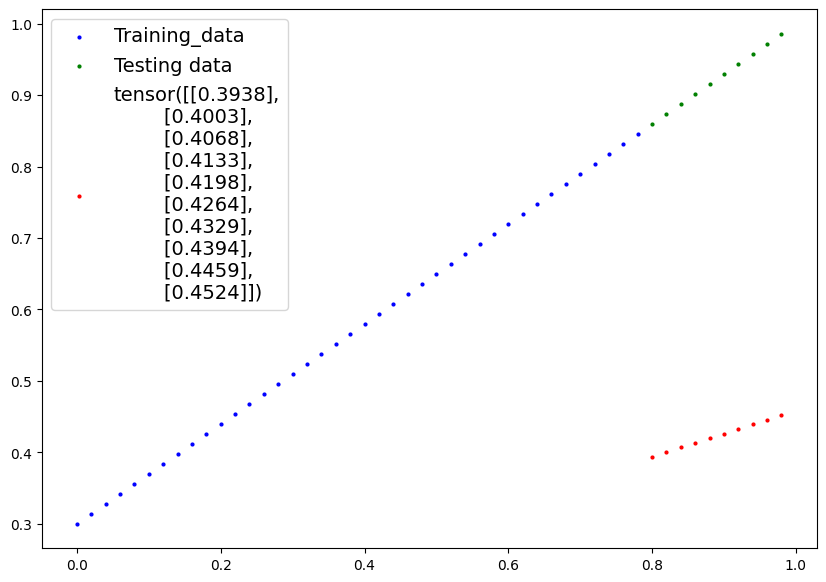

In [25]:
plot_predictions(predictions=y_preds)

Because iour model is initialized with random parameters, the output is pretty random.

`inference_model()` makes predictions

In [30]:
### You can do this as well without inference_mode()
y_preds = model_0(X_test)
y_preds

### Check out the gradient that is being tracked

tensor([[0.3938],
        [0.4003],
        [0.4068],
        [0.4133],
        [0.4198],
        [0.4264],
        [0.4329],
        [0.4394],
        [0.4459],
        [0.4524]], grad_fn=<AddBackward0>)

 * `inference_mode()` won't have a `grad` function
 * `inference_mode()` disables all the useful things that we have available during training. This means that PyTorch is keeping track of less data and our predictions will be faster because we are not keeping track of gradients that are being saved to memory
 * You can do the same thing with `toch.no_grad()` but `inference_mode()` is preferred.


In [32]:
### You can use this as well
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

### This is not the preferred way but also works for turning off grads

tensor([[0.3938],
        [0.4003],
        [0.4068],
        [0.4133],
        [0.4198],
        [0.4264],
        [0.4329],
        [0.4394],
        [0.4459],
        [0.4524]])

## 3. Train model

The idea is for our model to move from some unknown parameters to some known parameters.

Or in other words from a poor representation of the data to a better representation.

One way to measure how poor or how wrong the model's predictions are is to use a loss function.

AKA: cost function, loss function, criteria

* **Loss function**: A function that can measure how wrong our model's predictions are from the ideal outputs.
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (eg weight & bias) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [36]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3258], requires_grad=True),
 Parameter containing:
 tensor([0.1332], requires_grad=True)]

In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3258])), ('bias', tensor([0.1332]))])

In [ ]:
# Setup a loss function
loss_fun = nn.L1Loss()  ## MAE

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), ## what params should I optimize?
                            lr=0.01)  ## default=0.1

Starts by randomly assigning these values

### Building a training (and testing) loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) - also called forwrd propogation - make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - the gradients of each of the gradients of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our parameters to improve the loss (**gradient descent**)
